In [ ]:
import pandas as pd

# importando os dados
df = pd.read_csv('threads_reviews.csv')
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [ ]:
# redefinindo os nomes das colunas que irei utilizar no modelo
df.rename(columns={'review_description': 'comentario', 'rating': 'nota'}, inplace=True)
df.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.comentario)
dicionario = vetorizar.get_feature_names_out()
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=dicionario)
# vetoriza os comentários, indicando onde cada, das 50 mais frequentes, palavras aparecem

matriz_esparsa

,Good,Instagram,It,Nice,The,This,Threads,Twitter,account,an,...,that,the,this,threads,to,twitter,use,with,you,your
0,0,0,0,0,0,0,0,0,0,0,...,3,3,2,0,3,0,0,0,2,0
1,0,0,1,0,0,0,0,0,0,1,...,0,4,0,0,6,0,2,0,1,0
2,0,0,1,0,0,0,0,1,0,0,...,3,1,0,1,3,0,0,0,1,1
3,0,0,0,0,0,1,0,0,0,0,...,2,4,1,0,5,0,0,1,0,0
4,0,0,1,0,1,0,1,0,0,0,...,3,0,0,0,4,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32905,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32906,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression

treino, teste, classe_treino,  classe_teste = train_test_split(bag_of_words, df.nota)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
regressao_logistica.score(teste, classe_teste)

0.5583373845405931

In [ ]:
def acuracia_modelo(df, texto, nota):
  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[nota])
  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, df[nota])

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)

In [ ]:
!pip install wordcloud

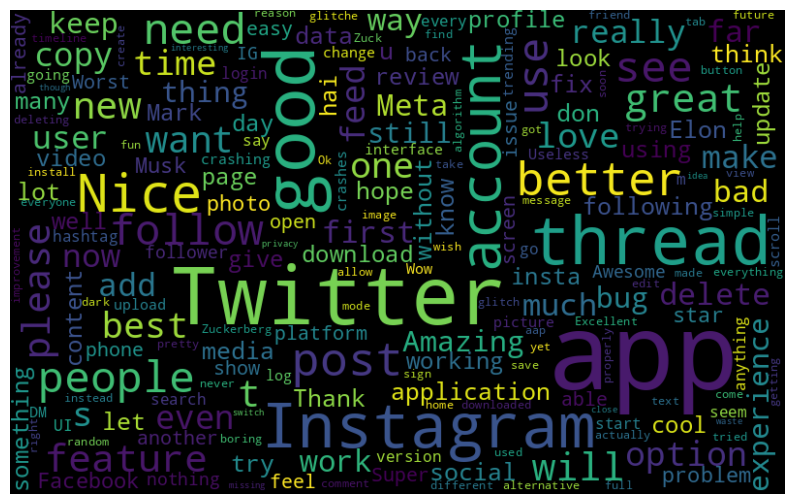

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

compactado = ' '.join([texto for texto in df.comentario])
# compacta todos os comentários numa só string

nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(compactado)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk

nltk.download('all')

In [ ]:
from nltk import tokenize

token_espaco = tokenize.WhitespaceTokenizer()
token_compactado = token_espaco.tokenize(compactado)
frequencia = nltk.FreqDist(token_compactado)
frequencia

FreqDist({'to': 10563, 'I': 9707, 'the': 9190, 'app': 8076, 'and': 7565, 'is': 6823, 'a': 6740, 'it': 5584, 'of': 4734, 'this': 4076, ...})

In [ ]:
df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()), 'Frequencia': list(frequencia.values())})
df_frequencia

,Palavra,Frequencia
0,Meh.,7
1,Not,673
2,the,9190
3,greatest,8
4,experience,448
...,...,...
37586,Returning,1
37587,"Zuck,Elon",1
37588,democratic.,1
37589,strangled,1


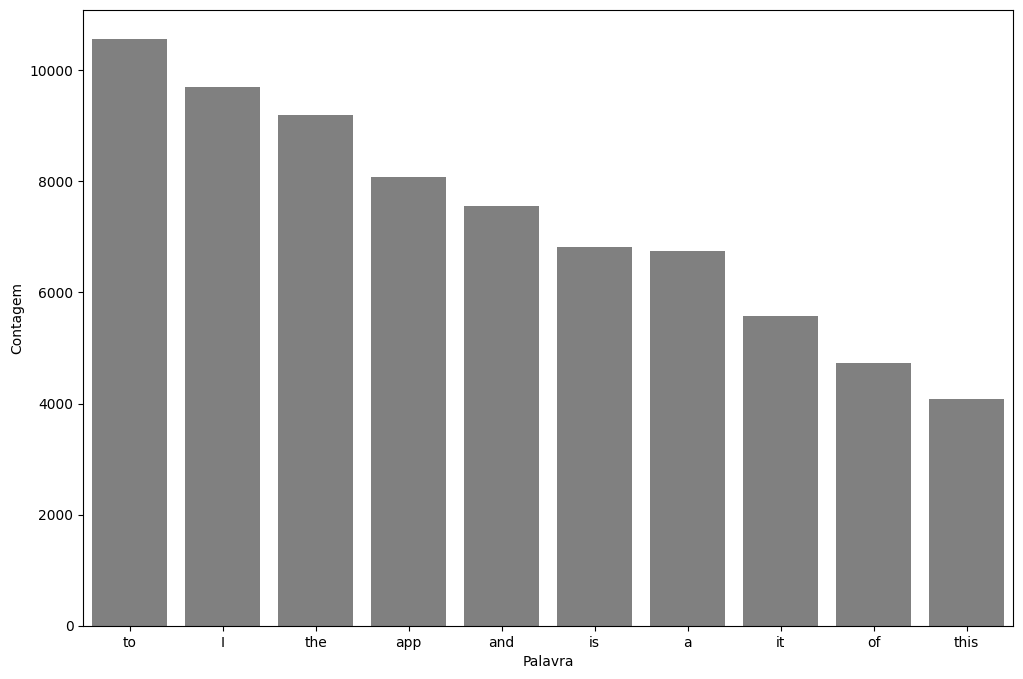

In [ ]:
df_frequencia10 = df_frequencia.nlargest(columns='Frequencia', n=10)

import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.barplot(data = df_frequencia10, x = 'Palavra', y = 'Frequencia', color = 'gray')
ax.set(ylabel='Contagem')
plt.show()

In [ ]:
def pareto(texto, coluna_texto, quantidade):
    compactado = ' '.join([texto for texto in texto[coluna_texto]])
    token_compactado = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words('english')

frase_processada = list()
for comentario in df.comentario:
  frase = list()
  palavras_opiniao = token_espaco.tokenize(comentario)
  for palavra in palavras_opiniao:
    if palavra not in palavras_irrelevantes:
      frase.append(palavra)
  frase_processada.append(' '.join(frase))

df['tratamento_1'] = frase_processada
df

,source,comentario,nota,review_date,tratamento_1
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,Meh. Not greatest experience Chromebook. Seems...
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,Pretty good first launch!! Its easy use self-e...
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,"For brand new app, well optimized. However mis..."
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,"Great app lot potential! However, lot needs fi..."
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,"The app good, needs lot functionality. For exa..."
...,...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55,This killed dog. Mark zuckerburg strangled him...
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06,Add Search hashtag like Twitter !
32907,App Store,bad twister,1,2023-07-17 06:39:13,bad twister
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16,Yet another trash Meta.
